In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from google.colab import files

In [2]:
# data
upload = files.upload()
data = pd.read_excel("dataGYM.xlsx")
data.head()

Saving dataGYM.xlsx to dataGYM.xlsx


,Age,Height,weight,BMI,Class,Prediction
0,48,4.1,86,40,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
1,53,4.1,91,42,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
2,42,4.1,95,44,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
3,48,4.1,100,46,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
4,22,4.1,104,48,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1176 non-null   int64  
 1   Height      1176 non-null   float64
 2   weight      1176 non-null   int64  
 3   BMI         1176 non-null   int64  
 4   Class       1176 non-null   object 
 5   Prediction  1176 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 55.2+ KB


In [4]:
df = data.iloc[:,:-1]
df["Class"].unique()

array(['Extremely obese', 'Healthy\xa0', 'Obese', 'Overweight',
       'Under weight', 'EXtremely obese'], dtype=object)

In [12]:
df.columns = ['Age', 'Height(feet)', 'weight(pounds)', 'BMI', 'Class']

In [14]:
# height is in feet, and weight is in pounds. BMI values are wrong(all of them). we have to correct the class also
# BMI = pounds lbs/(height in inches(feet x 12))^2
df["BMI"] = round((df["weight(pounds)"]/(df["Height(feet)"]*12)**2)*703, 1)
df.head()

,Age,Height(feet),weight(pounds),BMI,Class
0,48,4.1,86,25.0,Extremely obese
1,53,4.1,91,26.4,Extremely obese
2,42,4.1,95,27.6,Extremely obese
3,48,4.1,100,29.0,Extremely obese
4,22,4.1,104,30.2,Extremely obese


In [36]:
#reasigning the incorrect classes
def bmi(val):
  if val < 18.5:
    return "Underweight"
  elif (val >= 18.5) and (val <= 24.9):
    return "Healthy"
  elif (val > 24.9) and (val <= 29.9):
    return "Overweight"
  else:
    return "Obesity"

In [33]:
df.head()

,Age,Height(feet),weight(pounds),BMI,Class
0,48,4.1,86,25.0,Extremely obese
1,53,4.1,91,26.4,Extremely obese
2,42,4.1,95,27.6,Extremely obese
3,48,4.1,100,29.0,Extremely obese
4,22,4.1,104,30.2,Extremely obese


In [38]:
df["Status"] = df["BMI"].apply(bmi)
df.head()

,Age,Height(feet),weight(pounds),BMI,Class,Status
0,48,4.1,86,25.0,Extremely obese,Overweight
1,53,4.1,91,26.4,Extremely obese,Overweight
2,42,4.1,95,27.6,Extremely obese,Overweight
3,48,4.1,100,29.0,Extremely obese,Overweight
4,22,4.1,104,30.2,Extremely obese,Obesity


In [39]:
df.drop("Class", axis=1, inplace=True)

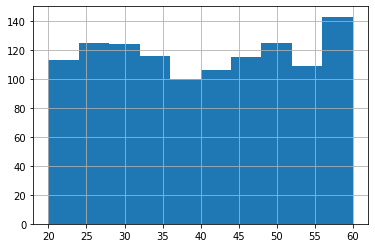

In [40]:
df["Age"].hist()

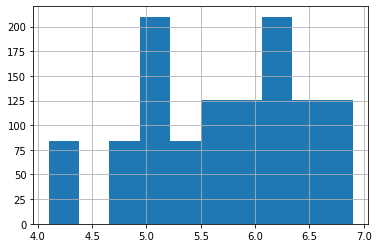

In [41]:
df["Height(feet)"].hist()

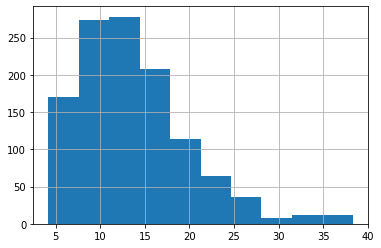

In [42]:
df["BMI"].hist()

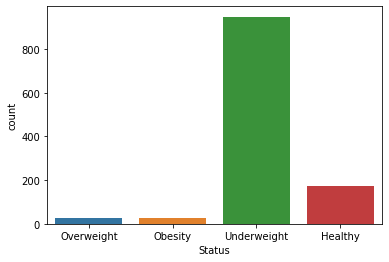

In [45]:
sns.countplot(df["Status"])

In [49]:
df.groupby("Status").mean()

,Age,Height(feet),weight(pounds),BMI
Status,,,,
Healthy,41.162791,5.031860,110.488372,21.223256
Obesity,36.821429,4.105000,117.857143,34.150000
Overweight,40.500000,4.480714,110.571429,26.778571
Underweight,39.654008,5.891962,80.126582,11.418354


In [51]:
x = df.iloc[:,:-2]
y = df.iloc[:,-1]

In [50]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
for i in [x_train, x_test, y_train, y_test]:
  print(i.shape)

(940, 3)
(236, 3)
(940,)
(236,)


In [53]:
sv_classifier = svm.SVC(kernel="linear")

In [54]:
#train the support vector classifier
sv_classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [61]:
def accuracy(model):
  y_pred_train = model.predict(x_train)
  print(f"Train accuracy: {accuracy_score(y_train, y_pred_train)}")
  y_pred_test = model.predict(x_test)
  print(f"Test accuracy: {accuracy_score(y_test, y_pred_test)}")
  print(f"\nClassification Report(test_data):\n {metrics.classification_report(y_test, y_pred_test)}")
  print(f"Confustion_metrix(test_data):\n\n {metrics.confusion_matrix(y_test, y_pred_test)}")

In [62]:
accuracy(sv_classifier)

Train accuracy: 0.9829787234042553
Test accuracy: 0.9788135593220338

Classification Report(test_data):
               precision    recall  f1-score   support

     Healthy       0.91      0.98      0.94        43
     Obesity       1.00      1.00      1.00         5
  Overweight       1.00      0.50      0.67         4
 Underweight       0.99      0.99      0.99       184

    accuracy                           0.98       236
   macro avg       0.98      0.87      0.90       236
weighted avg       0.98      0.98      0.98       236

Confustion_metrix(test_data):

 [[ 42   0   0   1]
 [  0   5   0   0]
 [  2   0   2   0]
 [  2   0   0 182]]


In [63]:
# Random forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=20)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [64]:
accuracy(rf_classifier)

Train accuracy: 1.0
Test accuracy: 0.9533898305084746

Classification Report(test_data):
               precision    recall  f1-score   support

     Healthy       0.92      0.81      0.86        43
     Obesity       1.00      1.00      1.00         5
  Overweight       0.75      0.75      0.75         4
 Underweight       0.96      0.99      0.98       184

    accuracy                           0.95       236
   macro avg       0.91      0.89      0.90       236
weighted avg       0.95      0.95      0.95       236

Confustion_metrix(test_data):

 [[ 35   0   1   7]
 [  0   5   0   0]
 [  1   0   3   0]
 [  2   0   0 182]]


In [67]:
# predictive system 
def gym_app():
  age = int(input("Your Age: "))
  height = float(input("Your height in feet: "))
  weight = float(input("Your weight in pounds: "))
  input_data = np.asarray([age, height, weight])
  input_data = input_data.reshape(1,-1)
  prediction  = sv_classifier.predict(input_data)
  prediction2 = rf_classifier.predict(input_data)
  print(f"SVM Classifier: {prediction}\nRandom_forest Classifier: {prediction2}")


In [68]:
gym_app()

Your Age: 48
Your height in feet: 4.1
Your weight in pounds: 86
SVM Classifier: ['Healthy']
Random_forest Classifier: ['Overweight']


Random Forest Classifier predicted well!
therefore we will create our pickle model using Random forest classifier

In [70]:
import pickle
pickle.dump(rf_classifier, open("rf_trained_model.sav", "wb"))